In [276]:
import torch
import os
import numpy as np
from matplotlib import pyplot as plt

In [277]:
all_animals = ['Fish','Goldfish','Harbor seal','Jellyfish',
              'Lobster','Oyster','Sea turtle','Squid','Starfish']
training_dir = r'animal_images/train'
testing_dir = r'animal_images/test'

In [278]:
print("training")
print(" ")
train_im = 0
for animal in all_animals:
    num = len(os.listdir(os.path.join(training_dir, animal)))
    train_im += num
    print(animal,num)
print(train_im)
    
print("\n")  
print("testing")
print(" ")
test_im =0
for animal in all_animals:
    num = len(os.listdir(os.path.join(testing_dir, animal)))
    test_im += num
    print(animal,num)
print(test_im)

training
 
Fish 89
Goldfish 65
Harbor seal 46
Jellyfish 85
Lobster 39
Oyster 62
Sea turtle 82
Squid 49
Starfish 104
621


testing
 
Fish 18
Goldfish 13
Harbor seal 15
Jellyfish 31
Lobster 14
Oyster 23
Sea turtle 23
Squid 25
Starfish 23
185


## Data preparation

In [279]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [280]:
# transform, Resize, and Normalize images

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256,256)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [281]:
# create image folders

data_train = ImageFolder(root=training_dir, transform=transform)
data_test = ImageFolder(root=testing_dir, transform=transform)

In [282]:
data_train[100][0].shape

torch.Size([3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


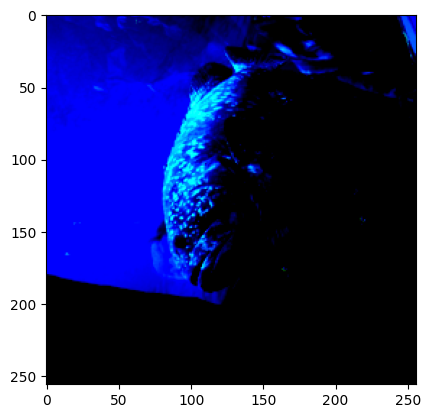

In [283]:
plt.imshow(data_train[0][0].numpy().T)

In [284]:
print("training samples:",len(data_train))
print("training classes:",data_train.classes)
print("testing samples:",len(data_test))
print("testing classes:",data_test.classes)

training samples: 621
training classes: ['Fish', 'Goldfish', 'Harbor seal', 'Jellyfish', 'Lobster', 'Oyster', 'Sea turtle', 'Squid', 'Starfish']
testing samples: 185
testing classes: ['Fish', 'Goldfish', 'Harbor seal', 'Jellyfish', 'Lobster', 'Oyster', 'Sea turtle', 'Squid', 'Starfish']


In [285]:
# create the dataloader

train_loader = DataLoader(data_train, batch_size= 69, shuffle=True)
test_loader = DataLoader(data_test, batch_size= 15, shuffle=True)

In [286]:
len(test_loader)

13

In [287]:
for batch,target in train_loader:
    print(target)

tensor([3, 6, 8, 8, 3, 4, 1, 1, 5, 3, 3, 3, 0, 5, 6, 3, 4, 5, 5, 8, 1, 8, 6, 7,
        0, 1, 3, 0, 8, 0, 0, 8, 2, 0, 5, 0, 7, 5, 0, 0, 8, 6, 5, 3, 6, 1, 1, 1,
        6, 1, 6, 6, 8, 4, 8, 1, 0, 6, 3, 2, 3, 2, 8, 7, 8, 7, 6, 2, 0])
tensor([4, 8, 4, 8, 3, 3, 8, 1, 6, 6, 2, 5, 6, 7, 1, 1, 3, 6, 8, 3, 8, 6, 6, 8,
        1, 1, 0, 5, 3, 4, 1, 6, 1, 8, 6, 8, 3, 5, 0, 8, 8, 3, 3, 3, 8, 3, 8, 0,
        6, 5, 7, 1, 6, 4, 2, 6, 1, 3, 8, 8, 2, 0, 2, 0, 5, 8, 2, 3, 0])
tensor([2, 8, 4, 2, 6, 5, 8, 6, 8, 1, 3, 4, 5, 1, 6, 8, 4, 1, 8, 0, 5, 3, 5, 4,
        0, 5, 0, 4, 0, 7, 1, 0, 8, 2, 7, 1, 0, 5, 8, 0, 8, 6, 6, 6, 6, 0, 4, 6,
        7, 6, 3, 7, 3, 7, 5, 4, 8, 3, 6, 4, 0, 6, 2, 0, 3, 2, 8, 8, 7])
tensor([2, 6, 6, 7, 5, 6, 8, 6, 8, 3, 6, 0, 5, 6, 2, 2, 0, 5, 0, 3, 6, 0, 3, 8,
        2, 1, 3, 1, 6, 2, 1, 8, 4, 8, 3, 8, 4, 5, 6, 3, 6, 0, 6, 1, 8, 4, 1, 8,
        3, 1, 2, 3, 4, 1, 8, 3, 6, 6, 2, 0, 2, 2, 6, 8, 8, 8, 3, 8, 3])
tensor([6, 1, 0, 7, 3, 7, 8, 4, 7, 0, 0, 4, 0, 5, 8, 3, 6, 2, 5, 0, 6, 1

In [288]:
for batch,target in test_loader:
    print(target)

tensor([1, 3, 1, 7, 4, 6, 8, 3, 3, 2, 4, 3, 7, 8, 0])
tensor([4, 6, 8, 5, 7, 1, 4, 0, 5, 3, 3, 7, 5, 6, 0])
tensor([2, 2, 7, 6, 0, 4, 2, 3, 5, 8, 7, 6, 7, 5, 3])
tensor([6, 7, 2, 7, 0, 0, 3, 5, 2, 1, 3, 5, 5, 8, 7])
tensor([1, 6, 1, 0, 5, 1, 5, 0, 4, 3, 3, 2, 0, 6, 7])
tensor([0, 2, 8, 4, 4, 6, 3, 5, 8, 8, 6, 7, 5, 5, 1])
tensor([1, 7, 0, 8, 6, 6, 2, 8, 8, 7, 2, 6, 0, 6, 6])
tensor([8, 7, 8, 3, 7, 5, 3, 4, 0, 3, 1, 0, 2, 2, 5])
tensor([6, 4, 2, 5, 6, 4, 1, 0, 6, 7, 3, 0, 3, 5, 3])
tensor([0, 7, 8, 0, 8, 3, 6, 7, 6, 3, 8, 2, 6, 7, 8])
tensor([3, 3, 8, 7, 5, 3, 4, 7, 3, 6, 1, 3, 8, 7, 8])
tensor([8, 5, 5, 4, 3, 6, 7, 1, 3, 5, 3, 3, 5, 8, 4])
tensor([5, 3, 8, 7, 2])


## Model

In [289]:
import torch.nn.functional as F

In [290]:

class convolu_model(torch.nn.Module):
    def __init__(self):
        super(convolu_model,self).__init__()
        
        self.dropout = torch.nn.Dropout(p=0.2)
        self.conv1 = torch.nn.Conv2d(3,12,3)
        self.pool = torch.nn.MaxPool2d(2,2)
        self.conv2 = torch.nn.Conv2d(12,24,3)
        self.conv3 = torch.nn.Conv2d(24,12,3)
        self.fc1 =torch.nn.Linear(12*30*30,120)
        self.fc2 =torch.nn.Linear(120,90)
        self.fc3 =torch.nn.Linear(90,9)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1,12*30*30)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        x = F.softmax(self.fc3(x), dim=1)
        #x = torch.argmax(x, dim=1)
        return x


In [291]:
'''
class convolu_model(torch.nn.Module):
    def __init__(self):
        super(convolu_model,self).__init__()
        
        self.dropout = torch.nn.Dropout(p=0.2)
        self.conv1 = torch.nn.Conv2d(3,16,3)
        self.pool = torch.nn.MaxPool2d(2,2)
        self.conv2 = torch.nn.Conv2d(16,32,3)
        self.conv3 = torch.nn.Conv2d(32,16,3)
        self.fc1 =torch.nn.Linear(16*30*30,256)
        self.fc2 =torch.nn.Linear(256,90)
        self.fc3 =torch.nn.Linear(90,9)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1,16*30*30)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        x = F.softmax(self.fc3(x), dim=1)
        #x = torch.argmax(x, dim=1)
        return x
'''

'\nclass convolu_model(torch.nn.Module):\n    def __init__(self):\n        super(convolu_model,self).__init__()\n        \n        self.dropout = torch.nn.Dropout(p=0.2)\n        self.conv1 = torch.nn.Conv2d(3,16,3)\n        self.pool = torch.nn.MaxPool2d(2,2)\n        self.conv2 = torch.nn.Conv2d(16,32,3)\n        self.conv3 = torch.nn.Conv2d(32,16,3)\n        self.fc1 =torch.nn.Linear(16*30*30,256)\n        self.fc2 =torch.nn.Linear(256,90)\n        self.fc3 =torch.nn.Linear(90,9)\n        \n    def forward(self, x):\n        x = self.pool(F.relu(self.conv1(x)))\n        x = self.pool(F.relu(self.conv2(x)))\n        x = self.pool(F.relu(self.conv3(x)))\n        x = x.view(-1,16*30*30)\n        x = self.dropout(x)\n        x = F.relu(self.fc1(x))\n        x = F.relu(self.fc2(x))\n        #x = self.fc3(x)\n        x = F.softmax(self.fc3(x), dim=1)\n        #x = torch.argmax(x, dim=1)\n        return x\n'

In [292]:
model = convolu_model().to('mps')

In [293]:
model.parameters

<bound method Module.parameters of convolu_model(
  (dropout): Dropout(p=0.2, inplace=False)
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(24, 12, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=10800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=9, bias=True)
)>

In [294]:
model(data_train[0][0].to('mps'))

tensor([[0.1200, 0.1086, 0.1031, 0.1127, 0.1094, 0.1039, 0.1096, 0.1243, 0.1085]],
       device='mps:0', grad_fn=<SoftmaxBackward0>)

# Train

In [295]:
epoch_num = 19

In [296]:
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [297]:
torch.tensor(data_train[0][1])

tensor(0)

In [298]:
criterion(torch.tensor([0.,0.,0.,0.,1.,0.,0.,0.,0.]),torch.tensor(4))

tensor(1.4608)

In [299]:
def training(epoch_num,train_loader):
    plot_loss = []
    running_loss = 0.
    last_loss = 0.
    batch_size = 0
    
    for epoch in range(epoch_num):
        for batch_idx, (data,target) in enumerate(train_loader):
            batch_size += 1
            y_pred = model(data.to('mps')).to('mps')
            loss = criterion(y_pred,target.to('mps'))
            plot_loss.append(loss.item())
        
            # update parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss  += loss.item()
            if batch_idx == 8:
                last_loss = running_loss / batch_size
                
                print("Epoch:",epoch + 1,"loss_per_batch:",last_loss,"loss:", loss.item()- 1.4608)
                batch_size = 0
                running_loss = 0.

In [300]:
training(epoch_num,train_loader)

Epoch: 1 loss_per_batch: 2.1817440191904702 loss: 0.7232090751647948
Epoch: 2 loss_per_batch: 2.1157483789655895 loss: 0.6241530696868896
Epoch: 3 loss_per_batch: 2.100406116909451 loss: 0.6333238403320312
Epoch: 4 loss_per_batch: 2.0874129136403403 loss: 0.6280764858245849
Epoch: 5 loss_per_batch: 2.0799466239081488 loss: 0.5396091262817382
Epoch: 6 loss_per_batch: 2.0635514789157443 loss: 0.6408931533813476
Epoch: 7 loss_per_batch: 2.038744820488824 loss: 0.5962995807647704
Epoch: 8 loss_per_batch: 2.009966942999098 loss: 0.5281720678329467
Epoch: 9 loss_per_batch: 1.9793546597162883 loss: 0.5755507270812987
Epoch: 10 loss_per_batch: 1.9591207106908162 loss: 0.45453803939819326
Epoch: 11 loss_per_batch: 1.9290104707082112 loss: 0.37926667137145986
Epoch: 12 loss_per_batch: 1.907891035079956 loss: 0.46653895778655996
Epoch: 13 loss_per_batch: 1.8791596757041082 loss: 0.278848938179016
Epoch: 14 loss_per_batch: 1.8624301883909438 loss: 0.35988324089050283
Epoch: 15 loss_per_batch: 1.82

# Validation

In [301]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [302]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [303]:
model = model.to('cpu')

In [304]:
for batch,target in test_loader:
    
    pred = model(batch.to('cpu')).to('cpu')
    target_list = torch.argmax(pred, dim=1)
    target =target.numpy()
    pred_array = np.array(target_list.tolist())
    
    print("test_set  :",target)
    print("prediction:",pred_array)
    
    
    pre.update_state(target, pred_array)
    re.update_state(target, pred_array)
    acc.update_state(target, pred_array)
    
    

test_set  : [5 4 4 3 5 3 5 7 6 6 4 5 2 0 3]
prediction: [0 8 8 3 5 3 6 1 8 8 1 1 0 8 3]
test_set  : [3 3 5 5 7 3 3 3 3 8 3 0 3 6 6]
prediction: [3 8 8 0 8 3 8 3 3 3 0 0 3 0 0]
test_set  : [7 4 1 0 0 8 2 5 7 1 4 5 7 6 3]
prediction: [8 1 0 6 6 8 8 0 6 1 1 6 0 8 3]
test_set  : [0 4 7 6 8 3 6 3 5 2 7 4 4 7 2]
prediction: [3 1 0 8 0 3 0 1 0 8 6 1 1 8 6]
test_set  : [6 7 7 7 8 3 4 3 1 2 6 6 6 6 8]
prediction: [8 8 1 1 8 3 0 6 0 2 5 8 6 6 0]
test_set  : [7 2 0 1 1 2 7 6 5 7 3 2 7 3 4]
prediction: [0 6 0 0 8 6 0 8 6 0 1 0 1 3 1]
test_set  : [5 5 1 2 6 8 8 3 8 3 5 7 8 6 8]
prediction: [0 0 1 0 6 8 0 0 5 3 8 0 8 0 1]
test_set  : [0 3 5 3 6 7 5 6 2 5 0 4 8 1 1]
prediction: [8 3 8 3 8 0 1 8 8 0 1 6 8 1 0]
test_set  : [1 0 8 1 0 4 2 4 7 6 7 8 5 3 2]
prediction: [8 5 1 8 6 1 3 8 1 0 1 8 1 0 6]
test_set  : [3 8 3 0 8 0 6 0 1 0 8 7 2 7 5]
prediction: [1 6 3 6 1 8 6 0 1 8 8 8 8 0 8]
test_set  : [0 3 3 7 1 7 3 1 3 8 6 2 5 2 8]
prediction: [0 3 3 0 1 8 1 1 3 1 6 0 6 8 8]
test_set  : [8 0 6 8 8 0 6 7 7 3

In [305]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9007092118263245, Recall:0.7604790329933167, Accuracy:0.07027027010917664
